# CONVERTING TO netCDF

In [ ]:
# using NCDatasets
using DataStructures

Path_NetCDF_Full  = joinpath(Path_Root, Path_NetCDF, NetCDF_Instates)



# NCDataset(Path_NetCDF_Full, "c",attrib = OrderedDict("title" => "Timoleague instates dataset", "creator" => "Joseph A.P. POLLACCO")) do NetCDF

#     defVar(NetCDF, splitext(Subcatchment_Output)[1], Subcatchment,("lon","lat"), attrib = OrderedDict(
#            "units" => "0 or 1",
#            "comments" => "1"
#     ))
# end

NCDataset(Path_NetCDF_Full,"c", attrib = OrderedDict("title" => "Timoleague instates dataset", "creator" => "Joseph A.P. POLLACCO")) do NetCDF

    defVar(NetCDF, splitext(Slope_Wflow)[1], Slope_Mask,("lon","lat"), attrib = OrderedDict(
           "units" => "degree",
           "comments" => "1"
    ))

   defVar(NetCDF, splitext(Subcatchment_Output)[1], Subcatchment,("lon","lat"), attrib = OrderedDict(
      "units" => "0 or 1",
      "comments" => "1"
    ))
# end


## **NETCDF**

In [ ]:
# using NCDatasets
# using DataStructures

# Path_NetCDF_Full  = joinpath(Path_Root, Path_NetCDF, NetCDF_Instates)



# # NCDataset(Path_NetCDF_Full, "c",attrib = OrderedDict("title" => "Timoleague instates dataset", "creator" => "Joseph A.P. POLLACCO")) do NetCDF

# #     defVar(NetCDF, splitext(Subcatchment_Output)[1], Subcatchment,("lon","lat"), attrib = OrderedDict(
# #            "units" => "0 or 1",
# #            "comments" => "1"
# #     ))
# # end

# NCDataset(Path_NetCDF_Full,"c", attrib = OrderedDict("title" => "Timoleague instates dataset", "creator" => "Joseph A.P. POLLACCO")) do NetCDF

#     defVar(NetCDF, splitext(Slope_Wflow)[1], Slope_Mask,("lon","lat"), attrib = OrderedDict(
#            "units" => "degree",
#            "comments" => "1"
#     ))

#    defVar(NetCDF, splitext(Subcatchment_Output)[1], Subcatchment,("lon","lat"), attrib = OrderedDict(
#       "units" => "0 or 1",
#       "comments" => "1"
#     ))
# end


In [61]:
using NCDatasets, DataStructures

Path_NetCDF_Full  = joinpath(Path_Root, Path_NetCDF, NetCDF_Instates)

 const nc_handle = Ref{NCDataset{Nothing}}()

isfile(Path_NetCDF_Full) && rm(Path_NetCDF_Full, force=true)
println(Path_NetCDF_Full)

# GENERAL INFORMATION
   NetCDF = NCDataset(Path_NetCDF_Full,"c")

   # Define the dimension "lon" and "lat"
      NCDatasets.defDim(NetCDF,"lon", Metadatas.N_Width)
      NCDatasets.defDim(NetCDF,"lat", Metadatas.N_Height)

   # Define a global attribute
      NetCDF.attrib["title"]   = "Timoleague instates dataset"
      NetCDF.attrib["creator"] = "Joseph A.P. POLLACCO"

# # == LDD input ==========================================
#    Ldd_NetCDF = defVar(NetCDF, splitext(Ldd_Python)[1], Float64, ("lon","lat"))

#    # write a the complete data set
#       Ldd_NetCDF[:,:] = Ldd_Mask

#    # write attributes
#       Ldd_NetCDF.attrib["units"] = "1-9"
#       Ldd_NetCDF.attrib["comments"] = "Derived from hydromt.flw.d8_from_dem"


# == SUBCATCHMENT input ==========================================
   Subcatchment_NetCDF = defVar(NetCDF, splitext(Subcatchment_Output)[1], UInt8 ,("lon","lat"))

   # write a the complete data set
      Subcatchment_NetCDF[:,:] = Subcatchment

   # write attributes
      Subcatchment_NetCDF.attrib["units"] = "1"
      Subcatchment_NetCDF.attrib["comments"] = "Derived from hydromt"


# == SLOPE input ==========================================
   Slope_NetCDF = defVar(NetCDF, splitext(Slope_Wflow)[1], Float32 ,("lon","lat"))

   # write a the complete data set
      Slope_NetCDF[:,:] = Slope_Mask

   # write attributes
      Slope_NetCDF.attrib["units"] = "-"
      Slope_NetCDF.attrib["comments"] = "Derived from hydromt"


# # == RIVER input ==========================================
#    River_NetCDF = defVar(NetCDF, splitext(River_Wflow)[1], Int64 ,("lon","lat"))

#    # write a the complete data set
#       River_NetCDF[:,:] = River_Mask

#    # write attributes
#       River_NetCDF.attrib["units"] = "0/1"
#       River_NetCDF.attrib["comments"] = "Derived from hydromt"

# # == RIVERSLOPE input ==========================================
#    River_NetCDF = defVar(NetCDF, splitext(River_Wflow)[1], Int64 ,("lon","lat"))

#    # write a the complete data set
#       River_NetCDF[:,:] = River_Mask

#    # write attributes
#       River_NetCDF.attrib["units"] = "0/1"
#       River_NetCDF.attrib["comments"] = "Derived from hydromt"

#    nc_handle[] = NetCDF

# # close(nc_handle[])
# # close(NetCDF)


Base.IOError: IOError: unlink("d:\\JOE\\MAIN\\MODELS\\WFLOW\\DATA\\Timoleague\\OutputNetCDF\\instates-Timoleague.nc"): resource busy or locked (EBUSY)

In [62]:
# All information of NCDataset
#  Data = NCDatasets.NCDataset(Path_NetCDF_Full, "r") do Output_NCDatasets
#    Output_NCDatasets["Ldd"][:,:]

#    Output_NCDatasets
#  end

 using NCDatasets
ds = NCDataset(Path_NetCDF_Full)



Dataset: d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\OutputNetCDF\instates-Timoleague.nc
Group: /

Dimensions
   lon = 921
   lat = 571

Variables
  Subcatchment   (921 × 571)
    Datatype:    UInt8 (UInt8)
    Dimensions:  lon × lat

Global attributes
  title                = Timoleague instates dataset
  creator              = Joseph A.P. POLLACCO


### ***=================================================================================================***
#### **NOT YET NEEDED**
### ***=================================================================================================***

## LDD D8

d:\JOE\MAIN\MODELS\WFLOW\DATA\Timoleague\OutputJulia\Ldd.tiff


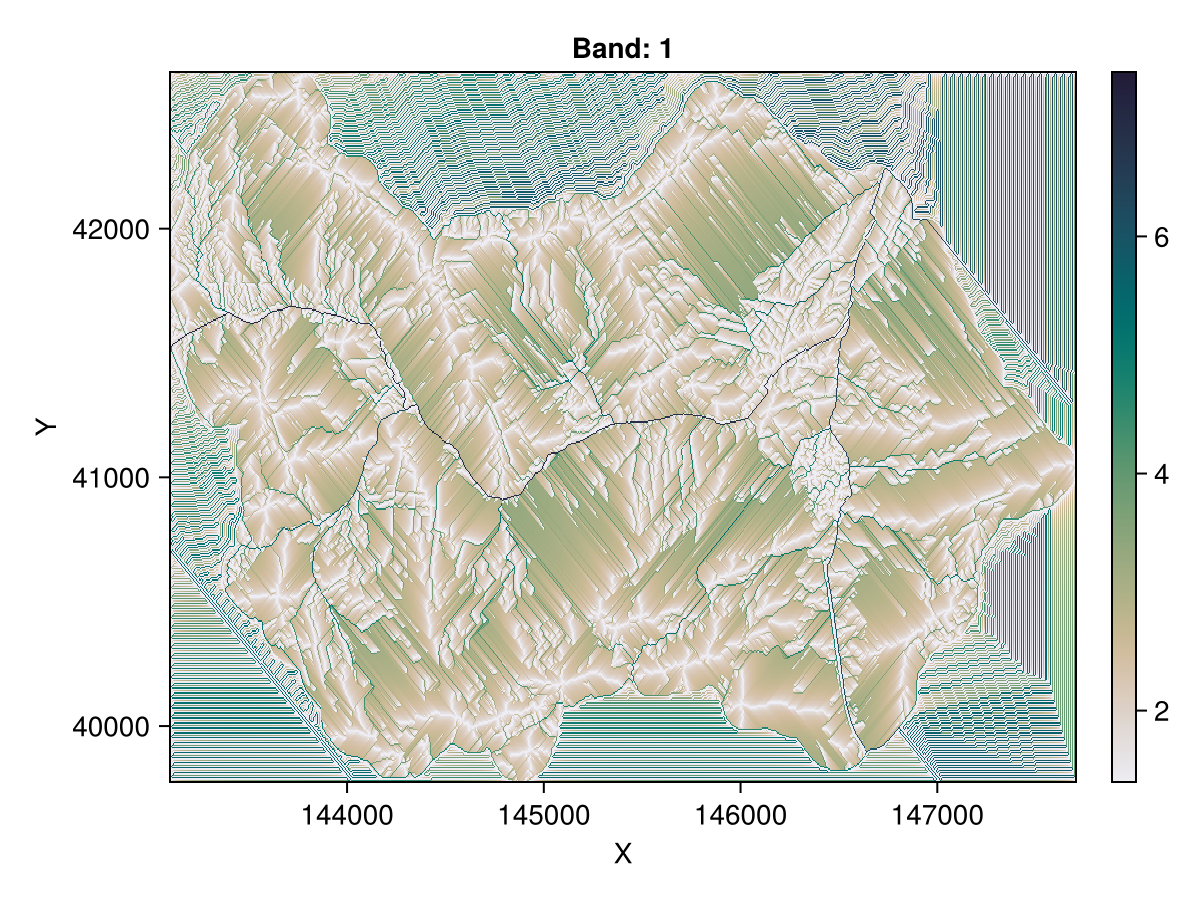

In [63]:
Output_Ldd         = "Ldd.tiff"
Path_OutputJulia_Ldd    = joinpath(Path_Root, Path_OutputJulia, Output_Ldd)
println(Path_OutputJulia_Ldd)

Acc, Ldd = Geomorphometry.flowaccumulation(Dem_Resample; method=D8())

Rasters.write(Path_OutputJulia_Ldd, Ldd; ext=".tiff", force=true, verbose=true, missingval= NaN)

CairoMakie.heatmap(log10.(Acc); colormap=:rain)


## COMPUTING SLOPE

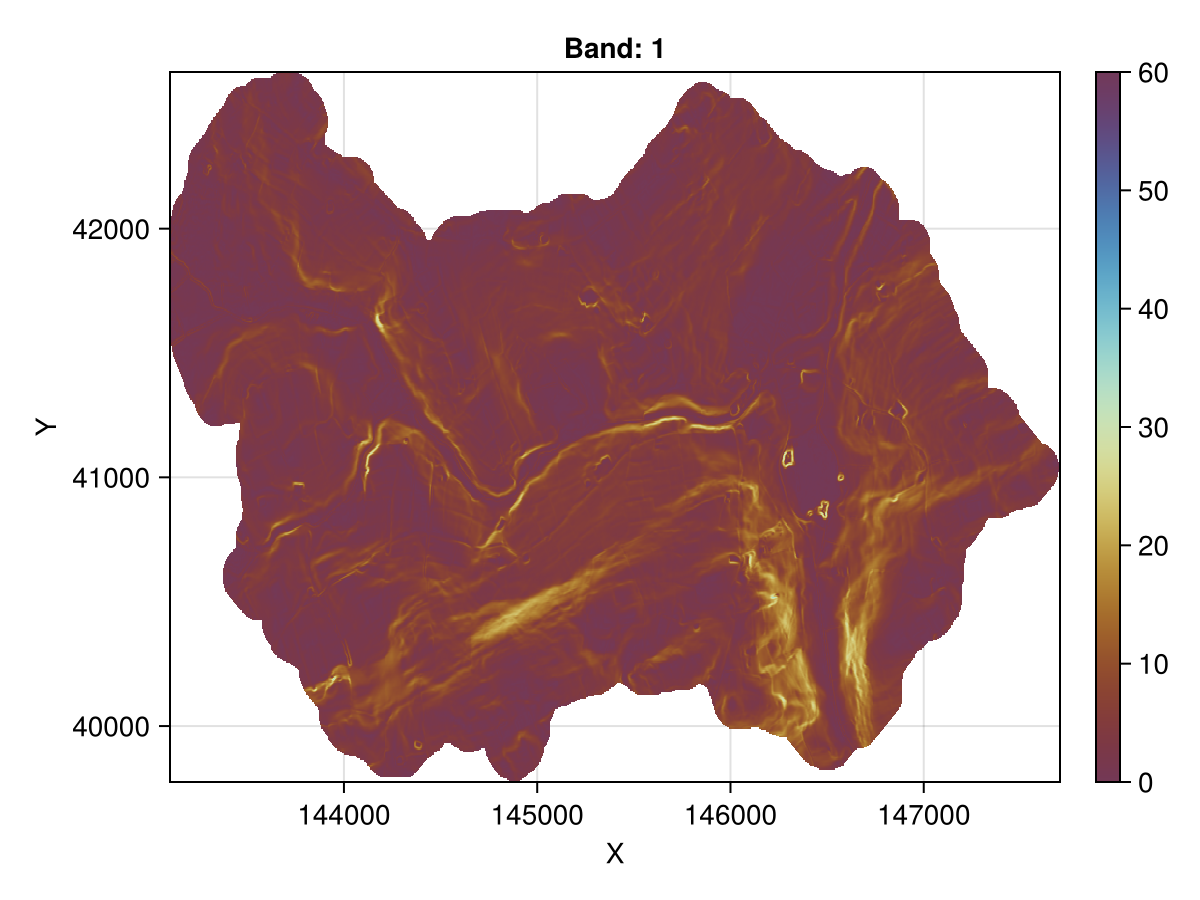

In [64]:

Path_OutputJulia_Slope    = joinpath(Path_Root, Path_OutputJulia, Slope_Wflow)

Slope = Geomorphometry.slope(Dem_Resample; method=Horn())

Rasters.write(Path_OutputJulia_Slope, Slope; ext=".tiff", force=true, verbose=true, missingval= NaN)

CairoMakie.heatmap(Slope ; colormap=:romaO, colorrange=(0, 60))
